a.Plot the observations

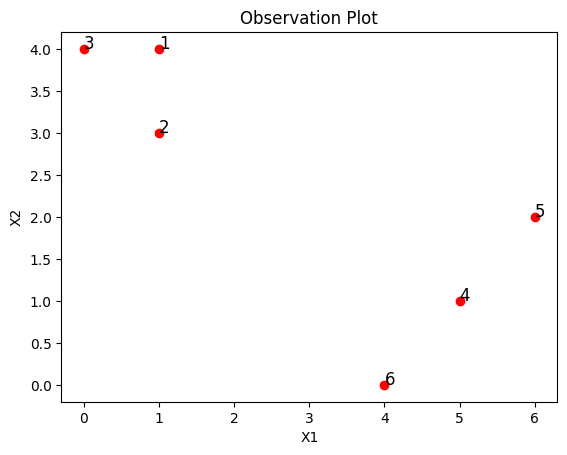

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X1=[1,1,0,5,6,4]
X2=[4,3,4,1,2,0]

X=list(zip(X1,X2))
for i in range(len(X)):
    plt.text(X1[i],X2[i],f'{i+1}',fontsize=12)

plt.scatter(X1,X2,color='red')
plt.title('Observation Plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



b.Randomly assign a cluster label to each observation.You can use the np.random.choice() function to do this.Report the cluster labels for each observation

Initial Cluster Labels: [0 1 0 0 0 1]


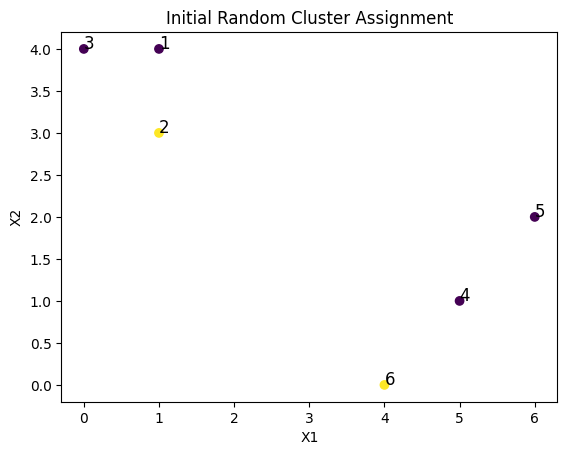

In [2]:
import numpy as np
X=list(zip(X1,X2))
np.random.seed(42)
cluster_labels=np.random.choice([0,1],size=len(X1))
print("Initial Cluster Labels:",cluster_labels)

plt.scatter(X1,X2,c=cluster_labels,cmap='viridis',label='Random Cluster Assignment')
for i in range(len(X)):
    plt.text(X1[i],X2[i],f'{i+1}',fontsize=12)
plt.title('Initial Random Cluster Assignment')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

c.Compute the centroid for each cluster

In [3]:
def compute_centroids(X,labels,K):
    centroids=[]
    #提取屬於群集k的觀察點
    for k in range(K):
        cluster_points=[X[i] for i in range(len(X)) if labels[i]==k]
        if cluster_points:
            centroid=np.mean(cluster_points,axis=0)
            centroids.append(centroid)
        else:
            centroids.append([0,0])
    return np.array(centroids)

#計算質心
K=2
centroids=compute_centroids(X,cluster_labels,K)
print("Initial Centroids:",centroids)

Initial Centroids: [[3.   2.75]
 [2.5  1.5 ]]


d.Assign each observation to the centroid to which it is closet,in terms of Euclidean distance.Report the cluster labels for each observation.

Reassigned Cluster Labels: [0 0 0 1 0 1]


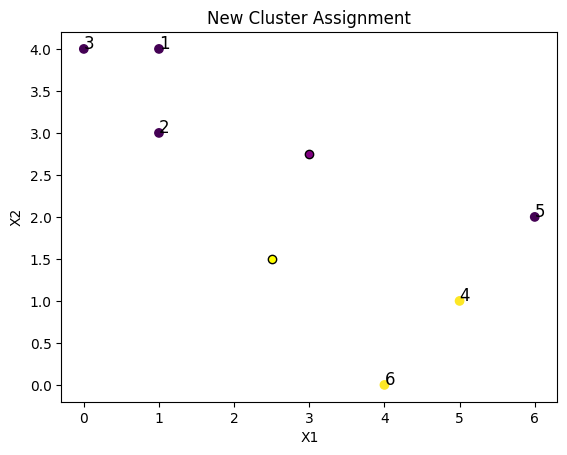

In [4]:
def assign_clusters(X,centroids):
    distances=np.linalg.norm(np.array(X)[:,np.newaxis]-centroids,axis=2)
    return np.argmin(distances,axis=1)

#依據最新的質心重分配
new_cluster_labels=assign_clusters(X,centroids)
print("Reassigned Cluster Labels:",new_cluster_labels)

plt.scatter(X1,X2,c=new_cluster_labels,cmap='viridis',label='New Cluster Assignment')
K=2
for k in range(K):
    plt.scatter(centroids[k,0],centroids[k,1],color='purple'if k==0 else 'yellow',edgecolor='black',label='Centroid{k+1}')
for i in range(len(X)):
    plt.text(X1[i],X2[i],f'{i+1}',fontsize=12)
plt.title('New Cluster Assignment')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

e.repeat (c) and (d) until the answers obtained stop changing

f.color the observations according to the cluster labels obtained

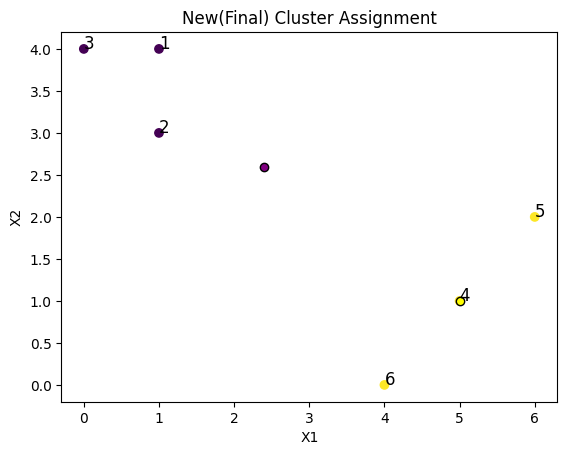

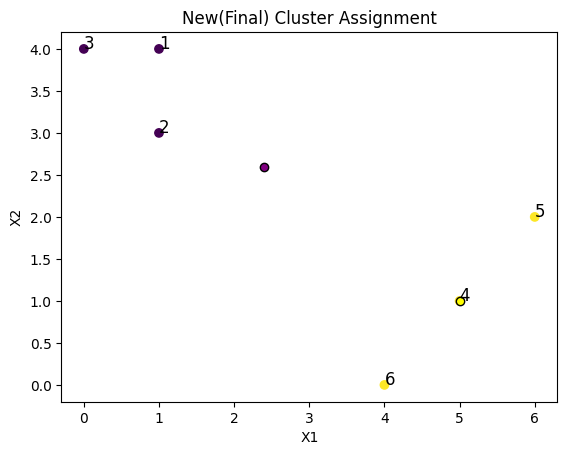

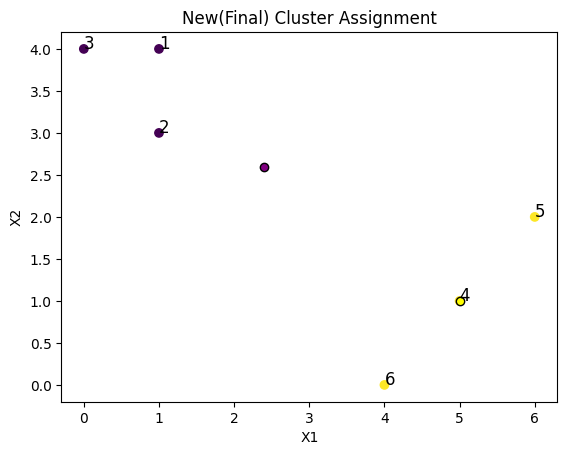

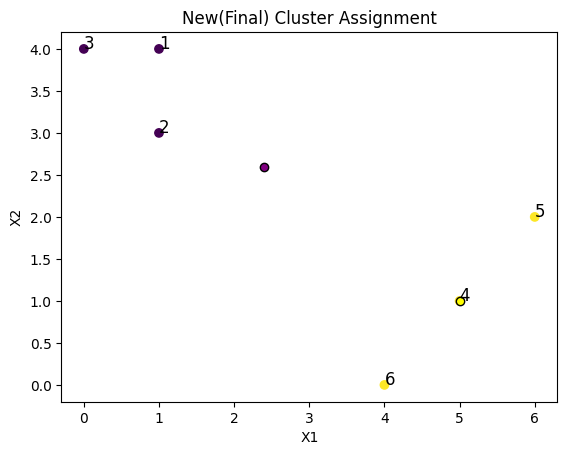

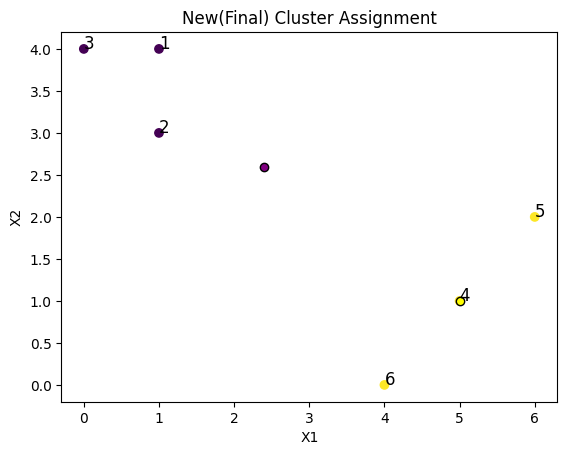

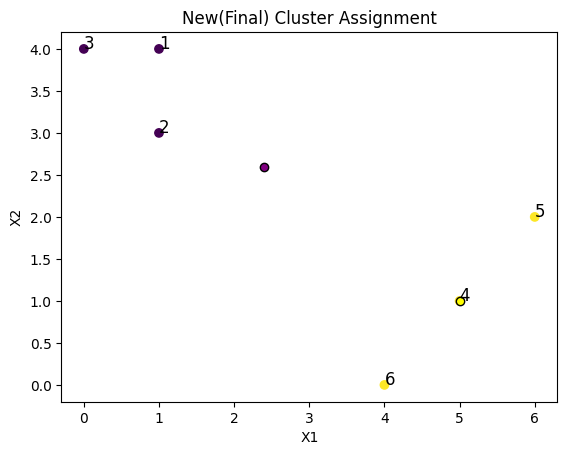

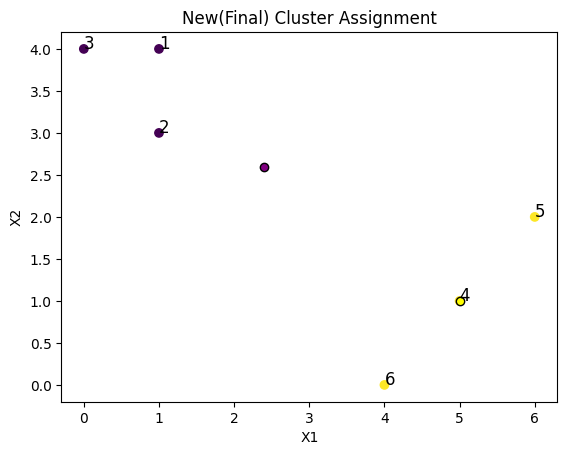

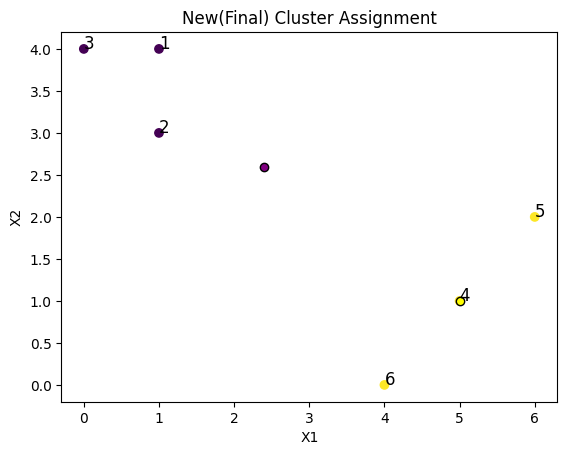

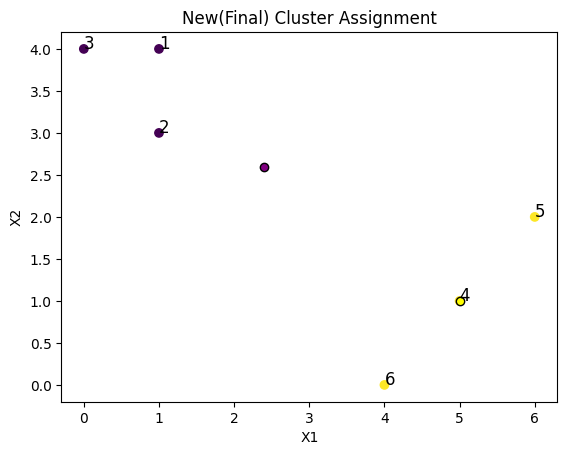

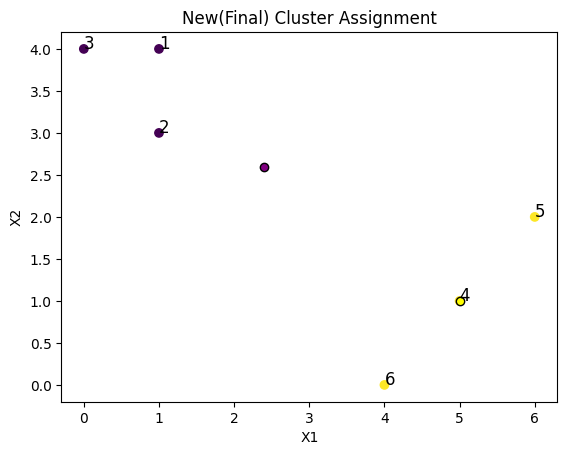

Final Cluster Labels: [0 0 0 1 0 0]
Final Centroids: [[2.4 2.6]
 [5.  1. ]]


In [5]:
def kmeans(X,K,max_iters=10):
    cluster_labels=np.random.choice([0,1],size=len(X))
    for i in range(max_iters):
        centroids=compute_centroids(X,cluster_labels,K)
        new_cluster_labels=assign_clusters(X,centroids)

        plt.scatter(X1,X2,c=new_cluster_labels,cmap='viridis',label=f'Iteration{i+1}')
        for k in range(K):
            plt.scatter(centroids[k,0],centroids[k,1],color='purple'if k==0 else 'yellow',edgecolor='black',label='Centroid{k+1}')
        for j in range(len(X)):
            plt.text(X1[j],X2[j],f'{j+1}',fontsize=12)
        plt.title('New(Final) Cluster Assignment')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

        if np.all(new_cluster_labels==cluster_labels):
            break
        new_cluster_labels==cluster_labels
    return cluster_labels,centroids


final_cluster_labels,final_centroids=kmeans(X,K)
print("Final Cluster Labels:",final_cluster_labels)
print("Final Centroids:",final_centroids)